# Tarea 2 - Map of Science _hagfish_
### Nombre: Joshué Ruiz Moreira

Basado en las sesiones de Visualización de datos y Expresiones regulares. Realice una adaptación de la solución del [`MAP OF SCIENCE`](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb). Se requiere dos adaptaciones para resolver esta actividad:
- Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,
- Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA). Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla [`Ubicación Geográfica de Países - Google Developer`](https://developers.google.com/public-data/docs/canonical/countries_csv). Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA, en su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.  

**Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:**
- en el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.
- la figura tiene etiquetas adecuadas en los ejes de la visualización. 
- se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión)

In [756]:
import re #expresiones regulares
import csv 

In [757]:
with open('data/pubmed-hagfish-set.txt', encoding='utf-8') as f:
    data = f.read() #lee todo el archivo de PubMed

In [758]:
print("Caracteres del documento obtenido de PubMed:", len(data))

Caracteres del documento obtenido de PubMed: 2970722


In [759]:
data = re.sub(r'\n\s{6}', ' ', data) #Eliminar espacios entre lineas de información de ADs*

In [760]:
print(data[:2000])

PMID- 33971350
OWN - NLM
STAT- MEDLINE
DCOM- 20210817
LR  - 20210817
IS  - 1879-1107 (Electronic)
IS  - 1096-4959 (Linking)
VI  - 255
DP  - 2021 Aug-Sep
TI  - From reductionism to synthesis: The case of hagfish slime.
PG  - 110610
LID - S1096-4959(21)00049-X [pii]
LID - 10.1016/j.cbpb.2021.110610 [doi]
AB  - Reductionist strategies aim to understand the mechanisms of complex systems by  studying individual parts and their interactions. In this review, we discuss how  reductionist approaches have shed light on the structure, function, and production  of a complex biomaterial - hagfish defensive slime. Hagfish slime is an extremely  dilute hydrogel-like material composed of seawater, mucus, and silk-like proteins  that can deploy rapidly. Despite being composed almost entirely of water, hagfish  slime has remarkable physical properties, including high strength and toughness.  While hagfish slime has a promising future in biomimetics, including the development  of eco-friendly high-perfor

En relación a la estructura que podemos visualizar en los ADs, con la siguiente expresión buscamos los nombres de los países:

In [761]:
coordenadas = re.findall(r'\,\s([A-zA-Z]{2,11})\.\n', data)

Estra expresión regular menciona:
```
\, -> empezará con coma
\s -> continuará con un espacio vacio
[A-zA-Z]{2,11} -> empezará y terminará con mayúsculas o empezará con mayúsculas y terminará con minúsculas, además tendra de 2 a 11 caracteres
\. -> terminará con punto
\n -> espacio en blanco
```

In [762]:
print("Número de coincidencias de países:", len(coordenadas))

Número de coincidencias de países: 915


Previamente se realizó una búsqueda de países únicos y se removió las opciones que no coincidian con nombres de países

In [763]:
coordenadas.remove("Basel")
coordenadas.remove("Beijing")
coordenadas.remove("CA")
coordenadas.remove("Conn")
coordenadas.remove("DC")
coordenadas.remove("England")
coordenadas.remove("Europe")
coordenadas.remove("FRG")
coordenadas.remove("Florida")
coordenadas.remove("Georgia")
coordenadas.remove("Illinois")
coordenadas.remove("Inc")
coordenadas.remove("Ltd")      
coordenadas.remove("MA")
coordenadas.remove("ME")
coordenadas.remove("ROC")
coordenadas.remove("Surrey")
coordenadas.remove("TBP")
coordenadas.remove("Uppsala")
coordenadas.remove("Valbonne") 
coordenadas.remove("WA")
coordenadas.remove("and")
coordenadas.remove("element")
coordenadas.remove("hagfish")
print("Numero de países:", len(coordenadas))
print("Países hasta el AD 50:", coordenadas[0:50])


Numero de países: 891
Países hasta el AD 50: ['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'Japan', 'USA', 'Taiwan', 'USA', 'Canada', 'Canada', 'Canada', 'USA', 'USA', 'Switzerland', 'Switzerland', 'Switzerland', 'Switzerland', 'Switzerland', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'USA', 'USA', 'Canada', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'ROC', 'ROC', 'Canada']


In [764]:
print(coordenadas)

['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'Japan', 'USA', 'Taiwan', 'USA', 'Canada', 'Canada', 'Canada', 'USA', 'USA', 'Switzerland', 'Switzerland', 'Switzerland', 'Switzerland', 'Switzerland', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'USA', 'USA', 'Canada', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'ROC', 'ROC', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Finland', 'Finland', 'Norway', 'UK', 'Norway', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'UK', 'China', 'China', 'Japan', 'Japan', 'Spain', 'Spain', 'Taiwan', 'China', 'Japan', 'Japan', 'Taiwan', 'Norway', 'UK', 'Finland', 'Finland', 'Finland', 'Norway', 'Norway', 'Germany', 'Canada', 'Canada', 'Canada', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'Canada', 'Canad

In [765]:
paises_unicos = list(set(coordenadas))
paises_unicos.sort()
print(paises_unicos)
len(paises_unicos)

['Argentina', 'Australia', 'Austria', 'Basel', 'Brazil', 'Canada', 'Chile', 'China', 'DC', 'Denmark', 'Ecuador', 'England', 'FRG', 'Finland', 'France', 'Georgia', 'Germany', 'Hungary', 'Inc', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'MA', 'ME', 'Netherlands', 'Norway', 'Portugal', 'ROC', 'Russia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'UK', 'USA', 'WA']


41

**Se importan las latitudes del documento <_coordenadas.csv_>**

In [777]:
import pandas as pd 
# Se importa la tabla
cords = pd.read_csv('data/coordenadas1.csv', engine='python', skipfooter=3)
cords.head(10)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


Debido a que los países escritos como _USA_, _ROC_ y _UK_ no va a tener relación con la marca que poseen en documento de las coordenadas original obtenido de internet, se remplazó los datos de estas variables en la tabla para que sean reconocidos y mostrados en el mapa.


In [767]:
#Tabla de países únicos concatenando con la tabla general
canc1 = pd.DataFrame({'name' : pd.Categorical(['Argentina', 'Australia', 'Austria', 'Basel', 'Brazil', 'Canada', 'Chile', 'China', 'DC', 'Denmark', 'Ecuador', 'England', 'FRG', 'Finland', 'France', 'Georgia', 'Germany', 'Hungary', 'Inc', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'South Korea', 'MA', 'ME', 'Netherlands', 'Norway', 'Portugal', 'ROC', 'Russia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'UK', 'USA', 'WA'])})
canc2 = pd.merge(cords, canc1, on=['name'], how='inner')
canc2

,country,latitude,longitude,name
0,AR,-38.416097,-63.616672,Argentina
1,AT,47.516231,14.550072,Austria
2,AU,-25.274398,133.775136,Australia
3,BR,-14.235004,-51.925280,Brazil
4,CA,56.130366,-106.346771,Canada
5,CH,46.818188,8.227512,Switzerland
6,CL,-35.675147,-71.542969,Chile
7,CN,35.861660,104.195397,China
8,DE,51.165691,10.451526,Germany
9,DK,56.263920,9.501785,Denmark


In [768]:
#Obtener latitud y longitud de los países únicos
latitude = canc2['latitude'].tolist()
longitude = canc2['longitude'].tolist()
print(latitude)
print(longitude)

[-38.416097, 47.516231, -25.274398, -14.235004, 56.130366, 46.818188, -35.675147, 35.86166, 51.165691, 56.26392, -1.831239, 40.463667, 61.92411, 46.227638, 55.378051, 42.315407, 47.162494, 53.41291, 31.046051, 32.427908, 41.87194, 36.204824, 35.907757, 52.132633, 60.472024, 39.399872, 61.52401, 60.128161, 1.352083, 15.870032, 23.69781, 23.69781, 37.09024]
[-63.616672, 14.550072, 133.775136, -51.92528, -106.346771, 8.227512, -71.542969, 104.195397, 10.451526, 9.501785, -78.183406, -3.74922, 25.748151, 2.213749, -3.435973, 43.356892, 19.503304, -8.24389, 34.851612, 53.688046, 12.56738, 138.252924, 127.766922, 5.291266, 8.468946, -8.224454, 105.318756, 18.643501, 103.819836, 100.992541, 120.960515, 120.960515, -95.712891]


In [769]:
#Función para almacenar los números de repeticiones de cada páis 
def contarElementosLista(coordenadas):
    """
    Recibe una lista, y devuelve un diccionario con todas las repeticiones de
    cada valor
    """
    return {i:coordenadas.count(i) for i in coordenadas}
 
resultado=contarElementosLista(coordenadas) 
print(resultado)

{'USA': 159, 'Japan': 193, 'Taiwan': 6, 'Canada': 147, 'Switzerland': 30, 'ROC': 6, 'Finland': 6, 'Norway': 12, 'UK': 24, 'China': 47, 'Spain': 24, 'Germany': 20, 'Inc': 32, 'Georgia': 1, 'Italy': 29, 'Australia': 19, 'Denmark': 11, 'Brazil': 1, 'Sweden': 15, 'France': 24, 'Hungary': 2, 'FRG': 5, 'Basel': 4, 'Austria': 2, 'Israel': 8, 'Korea': 20, 'Russia': 5, 'MA': 4, 'WA': 2, 'ME': 1, 'Portugal': 1, 'Iran': 2, 'Thailand': 1, 'England': 1, 'Singapore': 17, 'Netherlands': 1, 'Ireland': 3, 'Argentina': 1, 'DC': 1, 'Chile': 3, 'Ecuador': 1}


In [770]:
conteo = 1, 2, 19, 1, 147, 30, 3, 47, 20, 11, 1, 24, 6, 24, 24, 1, 2, 3, 8, 2, 29, 193, 20, 1, 12, 1, 5, 15, 17, 1, 6, 6, 159


* * *

Para realizar el mapa, se podria realizar una nueva tabla que ingrese solo los valores que se veran representados:

In [771]:
mapc = pd.DataFrame({'latitude' : [-38.416097, 47.516231, -25.274398, -14.235004, 56.130366, 46.818188, -35.675147, 35.86166, 51.165691, 56.26392, -1.831239, 40.463667, 61.92411, 46.227638, 55.378051, 42.315407, 47.162494, 53.41291, 31.046051, 32.427908, 41.87194, 36.204824, 35.907757, 52.132633, 60.472024, 39.399872, 61.52401, 60.128161, 1.352083, 15.870032, 23.69781, 23.69781, 37.09024],
                    'longitude' : [-63.616672, 14.550072, 133.775136, -51.92528, -106.346771, 8.227512, -71.542969, 104.195397, 10.451526, 9.501785, -78.183406, -3.74922, 25.748151, 2.213749, -3.435973, 43.356892, 19.503304, -8.24389, 34.851612, 53.688046, 12.56738, 138.252924, 127.766922, 5.291266, 8.468946, -8.224454, 105.318756, 18.643501, 103.819836, 100.992541, 120.960515, 120.960515, -95.712891],
                    'name' : pd.Categorical(['Argentina', 'Austria', 'Australia', 'Brazil', 'Canada', 'Switzerland', 'Chile', 'China', 'Germany', 'Denmark', 'Ecuador', 'Spain', 'Finland', 'France', 'UK', 'Georgia', 'Hungary', 'Ireland', 'Israel', 'Iran', 'Italy', 'Japan', 'South Korea', 'Netherlands', 'Norway', 'Portugal', 'Russia', 'Sweden', 'Singapore', 'Thailand', 'Taiwan', 'ROC', 'USA']), 
                    'count' : [1, 2, 19, 1, 147, 30, 3, 47, 20, 11, 1, 24, 6, 24, 24, 1, 2, 3, 8, 2, 29, 193, 20, 1, 12, 1, 5, 15, 17, 1, 6, 6, 159]})
                    
mapc #Tabla de los paises con su repeticiones en artículos

,latitude,longitude,name,count
0,-38.416097,-63.616672,Argentina,1
1,47.516231,14.550072,Austria,2
2,-25.274398,133.775136,Australia,19
3,-14.235004,-51.925280,Brazil,1
4,56.130366,-106.346771,Canada,147
5,46.818188,8.227512,Switzerland,30
6,-35.675147,-71.542969,Chile,3
7,35.861660,104.195397,China,47
8,51.165691,10.451526,Germany,20
9,56.263920,9.501785,Denmark,11


**Realizar el mapa de ciencia**

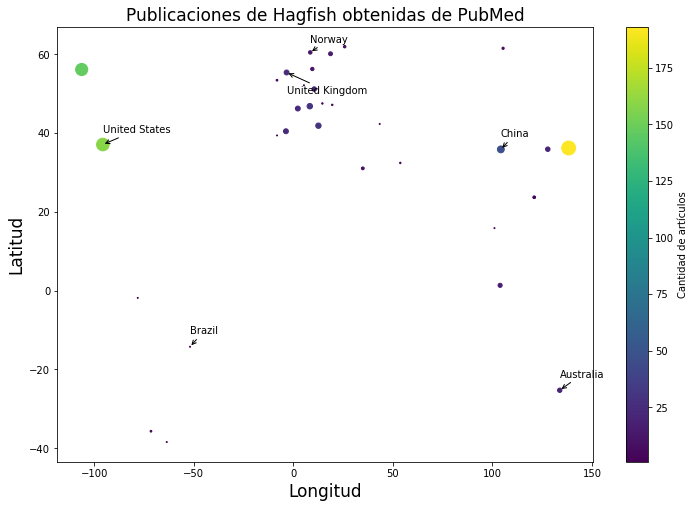

In [812]:
import matplotlib.pyplot as plt
plt.scatter(mapc.longitude, mapc.latitude, s= conteo, c= conteo)
plt.colorbar(label="Cantidad de artículos", orientation="vertical")

ard = dict(arrowstyle="->")
plt.annotate('United States', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('United Kingdom', xy = (-3.435973,55.378051), 
               xytext = (-3.435973,50), arrowprops= ard)
plt.annotate('Brazil', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('China', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('Norway', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)

plt.xlabel('Longitud', fontsize=17)
plt.ylabel('Latitud', fontsize=17)
plt.title('Publicaciones de Hagfish obtenidas de PubMed', fontsize=17)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 2, plSize[1] * 2) )
plt.show()